# **Proyek Analisis Data: Air Quality Dataset**
- **Nama:** Muhammad Iqbal Ainur Rohman
- **Email:** m004d4ky1955@bangkit.academy
- **ID Dicoding:** m004d4ky1955

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi rata-rata konsentrasi PM2.5 di setiap stasiun pengamatan?
- Kota mana yang paling tercemar oleh kandungan PM2.5 dan PM10 dalam rentang 1 Maret 2013 hingga 28 Februari 2017?
- Bagaimana kondisi antar variabel PM2.5, PM10, dan CO saling mempengaruhi di udara?
- Bagaimana kondisi PM2.5, PM10, dan CO selama rentang waktu tersebut?

> Penelitian difokuskan pada partikel-partikel PM2.5 (particulate matter dengan diameter kurang dari 2,5 mikrometer) dan PM10 (particulate matter dengan diameter kurang dari 10 mikrometer) sering dianggap sebagai indikator utama polusi udara, karena mereka dapat menembus jauh ke dalam sistem pernapasan manusia dan memiliki dampak negatif yang signifikan terhadap kesehatan.

## **Import Semua Packages/Library yang Digunakan**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [ ]:
pip install streamlit babel

## **Data Wrangling**

### Gathering Data

In [15]:
# Dongsi
dongsi_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")

# Guanyuan
guanyuan_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")

# Gucheng
gucheng_df = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")

# Shunyi
shunyi_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")

# Wanliu
wanliu_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")


### Assessing Data
Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

#### **Dongsi Dataframe**

---



In [6]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


> Terdapat perbedaan jumlah data di setiap kolom pada dongsi_df. Artinya, terdapat missing value pada dongsi_df. Berikut adalah jumlah missing value tiap kolom pada dongsi_df.

In [7]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

> Terlalu banyak missing value pada dongsi_df. Berikutnya adalah deteksi mengenai duplikasi data dongsi_df.

In [8]:
print("Total duplikasi data : ", dongsi_df.duplicated().sum())

Total duplikasi data :  0


> Tidak terdapat duplikasi data pada dongsi_df.

> Berikut adalah analisis statistika deskriptif untuk dongsi_df.

In [9]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


> Statistika deskriptif tersebut masih tidak akurat karena banyaknya missing value pada data frame.

#### **Guanyuan Dataframe**

---


In [10]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


> Terdapat perbedaan jumlah data di setiap kolom pada guanyuan_df. Artinya, terdapat missing value pada guanyuan_df. Berikut adalah jumlah missing value tiap kolom pada guanyuan_df.

In [11]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

> Terlalu banyak missing value pada guanyuan_df. Berikutnya adalah deteksi mengenai duplikasi data guanyuan_df.

In [12]:
print("Total duplikasi data : ", guanyuan_df.duplicated().sum())

Total duplikasi data :  0


> Tidak terdapat duplikasi data pada guanyuan_df.

> Berikut adalah analisis statistika deskriptif untuk guanyuan_df.

In [13]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


> Statistika deskriptif tersebut masih tidak akurat karena banyaknya missing value pada data frame.

####**Gucheng Dataframe**

---


In [16]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


> Terdapat perbedaan jumlah data di setiap kolom pada gucheng_df. Artinya, terdapat missing value pada gucheng_df. Berikut adalah jumlah missing value tiap kolom pada gucheng_df.

In [17]:
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

> Terlalu banyak missing value pada gucheng_df. Berikutnya adalah deteksi mengenai duplikasi data gucheng_df.

In [18]:
print("Total duplikasi data : ", gucheng_df.duplicated().sum())

Total duplikasi data :  0


> Tidak terdapat duplikasi data pada gucheng_df.

> Berikut adalah analisis statistika deskriptif untuk gucheng_df.

In [20]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


> Statistika deskriptif tersebut masih tidak akurat karena banyaknya missing value pada data frame.

####**Shunyi Dataframe**

---

In [21]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


> Terdapat perbedaan jumlah data di setiap kolom pada shunyi_df. Artinya, terdapat missing value pada shunyi_df. Berikut adalah jumlah missing value tiap kolom pada shunyi_df.

In [22]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

> Terlalu banyak missing value pada shunyi_df. Berikutnya adalah deteksi mengenai duplikasi data shunyi_df.

In [23]:
print("Total duplikasi data : ", shunyi_df.duplicated().sum())

Total duplikasi data :  0


> Tidak terdapat duplikasi data pada shunyi_df.

> Berikut adalah analisis statistika deskriptif untuk shunyi_df.

In [25]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


> Statistika deskriptif tersebut masih tidak akurat karena banyaknya missing value pada data frame.

####**Wanliu Dataframe**

---



In [26]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


> Terdapat perbedaan jumlah data di setiap kolom pada wanliu_df. Artinya, terdapat missing value pada wanliu_df. Berikut adalah jumlah missing value tiap kolom pada wanliu_df.

In [28]:
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

> Terlalu banyak missing value pada wanliu_df. Berikutnya adalah deteksi mengenai duplikasi data wanliu_df.

In [30]:
print("Total duplikasi data : ", wanliu_df.duplicated().sum())

Total duplikasi data :  0


> Tidak terdapat duplikasi data pada wanliu_df.

> Berikut adalah analisis statistika deskriptif untuk wanliu_df.

In [31]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


> Statistika deskriptif tersebut masih tidak akurat karena banyaknya missing value pada data frame.

### Cleaning Data
Proses membersihkan data sebelum masuk tahap analisis data. Masalah tiap dataframe di atas adalah sama, yaitu tentang missing value dan terdapat tipe data yang tidak sesuai. Berikut adalah gambaran umum data cleaning.

**Define** : Missing value pada tiap dataframe.

**Code** : Mengonversi hal tersebut menjadi sebuah kode program yang dapat dijalankan.

**Test** : kita perlu memeriksa kembali data yang telah dibersihkan tersebut. Hal ini untuk memastikan proses pembersihan data dilakukan sesuai ekspektasi kita.

####**Missing Value**

---
Untuk mengatasi missing value, dilakukan metode interpolasi pada data yang bersifat numerik dan metode modus untuk data yang bersifat kategori. Seluruh baris memuat informasi yang penting dan data berupa timeseries sehingga metode drop data tidak dilakukan.


> Mengatasi missing value pada data kategori wd

In [37]:
# Dongsi Dataframe
dongsi_wd_mode = dongsi_df['wd'].mode()[0]
dongsi_df['wd'] = dongsi_df['wd'].fillna(dongsi_wd_mode)

# Guanyuan Dataframe
guanyuan_wd_mode = guanyuan_df['wd'].mode()[0]
guanyuan_df['wd'] = guanyuan_df['wd'].fillna(guanyuan_wd_mode)

# Gucheng Dataframe
gucheng_wd_mode = gucheng_df['wd'].mode()[0]
gucheng_df['wd'] = gucheng_df['wd'].fillna(gucheng_wd_mode)

# Shunyi Dataframe
shunyi_wd_mode = shunyi_df['wd'].mode()[0]
shunyi_df['wd'] = shunyi_df['wd'].fillna(shunyi_wd_mode)

# Wanliu Dataframe
wanliu_wd_mode = wanliu_df['wd'].mode()[0]
wanliu_df['wd'] = wanliu_df['wd'].fillna(wanliu_wd_mode)

> Mengatasi missing value pada data numerik. Metode yang digunakan adalah cubic spline interpolation karena  cocok untuk menangani perubahan yang lebih kompleks dalam data time series.

In [38]:
# Dongsi Dataframe
dongsi_df = dongsi_df.interpolate(method='spline', order=3)

# Guanyuan Dataframe
guanyuan_df = guanyuan_df.interpolate(method='spline', order=3)

# Gucheng Dataframe
gucheng_df = gucheng_df.interpolate(method='spline', order=3)

# Shunyi Dataframe
shunyi_df = shunyi_df.interpolate(method='spline', order=3)

# Wanliu Dataframe
wanliu_df = wanliu_df.interpolate(method='spline', order=3)

> Selanjutnya adalah melakukan test untuk mengetahui bahwa missing value benar-benar diatasi.

In [39]:
# Dongsi Dataframe
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [131]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.707535,110.733069,18.546761,59.952047,2864.810264,57.709134,13.668235,1012.552110,2.445139,0.064016,1.860959
std,10122.249256,1.177213,3.448752,8.800218,6.922285,87.567382,98.939032,23.056043,60.845159,6669.146131,58.710216,11.459703,10.266485,13.811994,0.786058,1.280276
min,1.000000,2013.000000,1.000000,1.000000,0.000000,-535.317252,-145.304465,-8.910169,-91.685331,-897.476327,-65.807512,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.581906,27.050162,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,87.000000,10.000000,48.000000,1100.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,152.000000,24.000000,75.000000,1941.181137,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,1049.423623,300.000000,538.354881,45982.136103,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


> Terdapat nilai negatif pada beberapa variabel yang tidak logis, diantaranya PM2.5, PM10, SO2, NO2, CO, dan O3. Tetapi kita akan melakukan cleaning hanya pada PM2.5, PM10, dan CO saja karena hanya ketiga kolom tersebut yang akan digunakan untuk analisis.

In [148]:
# PM2.5
mean1_pm25 = dongsi_df['PM2.5'].mean()
dongsi_df['PM2.5'] = dongsi_df['PM2.5'].mask(dongsi_df['PM2.5'] < 0, mean1_pm25)

# PM10
mean1_pm10 = dongsi_df['PM10'].mean()
dongsi_df['PM10'] = dongsi_df['PM10'].mask(dongsi_df['PM10'] < 0, mean1_pm10)

# CO
mean1_co = dongsi_df['CO'].mean()
dongsi_df['CO'] = dongsi_df['CO'].mask(dongsi_df['CO'] < 0, mean1_co)

In [149]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.335544,110.822904,18.546761,59.952047,2869.447111,57.709134,13.668235,1012.552110,2.445139,0.064016,1.860959
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.554419,98.859386,23.056043,60.845159,6667.958659,58.710216,11.459703,10.266485,13.811994,0.786058,1.280276
min,1.000000,2013.000000,1.000000,1.000000,0.000000,0.025753,0.317959,-8.910169,-91.685331,15.834544,-65.807512,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.581906,27.050162,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,87.000000,10.000000,48.000000,1100.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,152.000000,24.000000,75.000000,2000.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,1049.423623,300.000000,538.354881,45982.136103,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


> Masalah sudah teratasi.

In [40]:
# Guanyuan Dataframe
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [143]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.156365,110.182739,17.809169,58.197440,1216.011479,54.352429,13.581556,1011.851921,3.120356,0.067416,1.708726
std,10122.249256,1.177213,3.448752,8.800218,6.922285,84.164286,102.862590,23.906316,36.135529,1333.235668,57.880739,11.400431,10.404566,13.690298,0.909796,1.203945
min,1.000000,2013.000000,1.000000,1.000000,0.000000,-179.238399,-336.816815,-2.010647,-45.041095,-7240.916685,-124.783209,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,30.000000,500.000000,6.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.890744,1600.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,1080.749641,1991.571574,293.000000,378.232166,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


> Terdapat nilai negatif pada beberapa variabel yang tidak logis, diantaranya PM2.5, PM10, SO2, NO2, CO, dan O3. Tetapi kita akan melakukan cleaning hanya pada PM2.5, PM10, dan CO saja karena hanya ketiga kolom tersebut yang akan digunakan untuk analisis.

In [150]:
# PM2.5
mean2_pm25 = guanyuan_df['PM2.5'].mean()
guanyuan_df['PM2.5'] = guanyuan_df['PM2.5'].mask(guanyuan_df['PM2.5'] < 0, mean2_pm25)

# PM10
mean2_pm10 = guanyuan_df['PM10'].mean()
guanyuan_df['PM10'] = guanyuan_df['PM10'].mask(guanyuan_df['PM10'] < 0, mean2_pm10)

# CO
mean2_co = guanyuan_df['CO'].mean()
guanyuan_df['CO'] = guanyuan_df['CO'].mask(guanyuan_df['CO'] < 0, mean2_co)

In [151]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.705461,110.581842,17.809169,58.197440,1284.468097,54.352429,13.581556,1011.851921,3.120356,0.067416,1.708726
std,10122.249256,1.177213,3.448752,8.800218,6.922285,83.640959,102.339202,23.906316,36.135529,1176.605058,57.880739,11.400431,10.404566,13.690298,0.909796,1.203945
min,1.000000,2013.000000,1.000000,1.000000,0.000000,0.102557,0.152854,-2.010647,-45.041095,4.436424,-124.783209,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,30.000000,500.000000,6.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.890744,1600.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,1080.749641,1991.571574,293.000000,378.232166,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


> Masalah sudah teratasi.

In [41]:
# Gucheng Dataframe
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35044 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [152]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35044.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.144386,119.154602,17.246696,55.923237,1349.898916,59.722475,13.855540,1008.835695,2.599981,0.064447,1.343633
std,10122.249256,1.177213,3.448752,8.800218,6.922285,83.493916,98.077120,65.004694,36.828888,1701.248417,78.210964,11.294863,10.104567,13.790260,0.838140,1.150636
min,1.000000,2013.000000,1.000000,1.000000,0.000000,-61.176884,-172.503243,-17.133237,-84.623273,-12999.964748,-448.795935,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-9.000000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,100.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,167.000000,20.000000,79.000000,1700.000000,84.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,836.579617,1186.439754,2658.970619,300.899696,19483.726533,1090.303698,41.600000,1038.100000,27.400000,41.900000,12.000000


> Terdapat nilai negatif pada beberapa variabel yang tidak logis, diantaranya PM2.5, PM10, SO2, NO2, CO, dan O3. Tetapi kita akan melakukan cleaning hanya pada PM2.5, PM10, dan CO saja karena hanya ketiga kolom tersebut yang akan digunakan untuk analisis.

In [153]:
# PM2.5
mean3_pm25 = gucheng_df['PM2.5'].mean()
gucheng_df['PM2.5'] = gucheng_df['PM2.5'].mask(gucheng_df['PM2.5'] < 0, mean3_pm25)

# PM10
mean3_pm10 = gucheng_df['PM10'].mean()
gucheng_df['PM10'] = gucheng_df['PM10'].mask(gucheng_df['PM10'] < 0, mean3_pm10)

# CO
mean3_co = gucheng_df['CO'].mean()
gucheng_df['CO'] = gucheng_df['CO'].mask(gucheng_df['CO'] < 0, mean3_co)

In [154]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35044.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.197895,119.270094,17.246696,55.923237,1396.414901,59.722475,13.855540,1008.835695,2.599981,0.064447,1.343633
std,10122.249256,1.177213,3.448752,8.800218,6.922285,83.459461,97.964348,65.004694,36.828888,1544.120557,78.210964,11.294863,10.104567,13.790260,0.838140,1.150636
min,1.000000,2013.000000,1.000000,1.000000,0.000000,1.594554,0.910362,-17.133237,-84.623273,11.581033,-448.795935,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-9.000000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,100.000000,7.000000,50.000000,1000.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,167.000000,20.000000,79.000000,1700.000000,84.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,836.579617,1186.439754,2658.970619,300.899696,19483.726533,1090.303698,41.600000,1038.100000,27.400000,41.900000,12.000000


> Masalah sudah teratasi.

In [42]:
# Shunyi Dataframe
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [156]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,77.708943,100.420672,13.461427,20.942404,1126.216887,60.842658,13.375522,1013.072572,2.451473,0.061088,1.807970
std,10122.249256,1.177213,3.448752,8.800218,6.922285,90.066215,102.756055,19.696797,251.810944,1405.773251,82.752652,11.485082,10.177876,13.731821,0.761115,1.287469
min,1.000000,2013.000000,1.000000,1.000000,0.000000,-623.850759,-151.927338,-49.164692,-3476.292003,-5217.301627,-158.007950,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,54.000000,77.000000,5.000000,36.185902,800.000000,43.000000,14.400000,1012.800000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,139.000000,17.000000,62.000000,1500.000000,79.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,2835.023112,239.000000,299.475741,20089.718576,862.979662,40.600000,1042.800000,27.500000,37.300000,12.800000


> Terdapat nilai negatif pada beberapa variabel yang tidak logis, diantaranya PM2.5, PM10, SO2, NO2, CO, dan O3. Tetapi kita akan melakukan cleaning hanya pada PM2.5, PM10, dan CO saja karena hanya ketiga kolom tersebut yang akan digunakan untuk analisis.

In [157]:
# PM2.5
mean4_pm25 = shunyi_df['PM2.5'].mean()
shunyi_df['PM2.5'] = shunyi_df['PM2.5'].mask(shunyi_df['PM2.5'] < 0, mean4_pm25)

# PM10
mean4_pm10 = shunyi_df['PM10'].mean()
shunyi_df['PM10'] = shunyi_df['PM10'].mask(shunyi_df['PM10'] < 0, mean4_pm10)

# CO
mean4_co = shunyi_df['CO'].mean()
shunyi_df['CO'] = shunyi_df['CO'].mask(shunyi_df['CO'] < 0, mean4_co)

In [158]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.230676,100.553347,13.461427,20.942404,1208.679233,60.842658,13.375522,1013.072572,2.451473,0.061088,1.807970
std,10122.249256,1.177213,3.448752,8.800218,6.922285,83.086325,102.659607,19.696797,251.810944,1253.460524,82.752652,11.485082,10.177876,13.731821,0.761115,1.287469
min,1.000000,2013.000000,1.000000,1.000000,0.000000,0.467270,0.932905,-49.164692,-3476.292003,0.885475,-158.007950,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,56.000000,77.000000,5.000000,36.185902,900.000000,43.000000,14.400000,1012.800000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,139.000000,17.000000,62.000000,1500.000000,79.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,2835.023112,239.000000,299.475741,20089.718576,862.979662,40.600000,1042.800000,27.500000,37.300000,12.800000


In [43]:
# Wanliu Dataframe
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [159]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.441740,110.784039,18.393916,99.383141,1705.847864,33.040362,13.425919,1011.102777,3.263876,0.068259,1.501437
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.161326,94.180510,22.733294,311.617196,3950.720199,153.423578,11.348102,10.356181,13.679351,0.896470,1.104348
min,1.000000,2013.000000,1.000000,1.000000,0.000000,-0.417340,-167.523008,-116.300463,1.642400,-10627.167657,-1906.492140,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.748700,500.000000,2.629838,3.100000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,61.000000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,90.000000,1700.000000,71.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,1143.278462,282.000000,3751.261827,44983.216931,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


> Terdapat nilai negatif pada beberapa variabel yang tidak logis, diantaranya PM2.5, PM10, SO2, NO2, CO, dan O3. Tetapi kita akan melakukan cleaning hanya pada PM2.5, PM10, dan CO saja karena hanya ketiga kolom tersebut yang akan digunakan untuk analisis.

In [160]:
# PM2.5
mean5_pm25 = wanliu_df['PM2.5'].mean()
wanliu_df['PM2.5'] = wanliu_df['PM2.5'].mask(wanliu_df['PM2.5'] < 0, mean5_pm25)

# PM10
mean5_pm10 = wanliu_df['PM10'].mean()
wanliu_df['PM10'] = wanliu_df['PM10'].mask(wanliu_df['PM10'] < 0, mean5_pm10)

# CO
mean5_co = wanliu_df['CO'].mean()
wanliu_df['CO'] = wanliu_df['CO'].mask(wanliu_df['CO'] < 0, mean5_co)

In [161]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.444132,110.877404,18.393916,99.383141,1755.778770,33.040362,13.425919,1011.102777,3.263876,0.068259,1.501437
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.160106,94.088833,22.733294,311.617196,3893.889987,153.423578,11.348102,10.356181,13.679351,0.896470,1.104348
min,1.000000,2013.000000,1.000000,1.000000,0.000000,1.964810,1.021892,-116.300463,1.642400,3.170239,-1906.492140,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.748700,600.000000,2.629838,3.100000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,10.000000,61.000000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,90.000000,1700.000000,71.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,1143.278462,282.000000,3751.261827,44983.216931,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


> Berdasarkan serangkaian test di atas, dapat diketahui bahwa masalah missing value benar-benar telah diatasi.

#### **Mengubah Format Data Tanggal**

---
Seluruh data yang tersedia adalah data tiap jam dengan kolom tahun, bulan, dan tahun tersendiri. Untuk memudahkan analisis data, dilakukan resample supaya data yang dianalisis selanjutnya berupa data harian.

In [162]:
# Dongsi Dataframe
dongsi_daily = dongsi_df
dongsi_daily['Date'] = pd.to_datetime(dongsi_daily['year'].astype(str) + '-' + dongsi_daily['month'].astype(str) + '-' + dongsi_daily['day'].astype(str))
dongsi_daily.set_index('Date', inplace=True)
dongsi_daily = dongsi_daily.resample(rule='D').agg({
    'PM2.5' : "mean",
    'PM10' : 'mean',
    'CO' : 'mean',
})
dongsi_daily.reset_index(inplace=True)
dongsi_daily['station'] = 'Dongsi'

# Guanyuan Dataframe
guanyuan_daily = guanyuan_df
guanyuan_daily['Date'] = pd.to_datetime(guanyuan_daily['year'].astype(str) + '-' + guanyuan_daily['month'].astype(str) + '-' + guanyuan_daily['day'].astype(str))
guanyuan_daily.set_index('Date', inplace=True)
guanyuan_daily = guanyuan_daily.resample(rule='D').agg({
    'PM2.5' : "mean",
    'PM10' : 'mean',
    'CO' : 'mean',
})
guanyuan_daily.reset_index(inplace=True)
dongsi_daily['station'] = 'Guanyuan'

# Gucheng Dataframe
gucheng_daily = gucheng_df
gucheng_daily['Date'] = pd.to_datetime(gucheng_daily['year'].astype(str) + '-' + gucheng_daily['month'].astype(str) + '-' + gucheng_daily['day'].astype(str))
gucheng_daily.set_index('Date', inplace=True)
gucheng_daily = gucheng_daily.resample(rule='D').agg({
    'PM2.5' : "mean",
    'PM10' : 'mean',
    'CO' : 'mean',
})
gucheng_daily.reset_index(inplace=True)
gucheng_daily['station'] = 'Gucheng'

# Shunyi Dataframe
shunyi_daily = shunyi_df
shunyi_daily['Date'] = pd.to_datetime(shunyi_daily['year'].astype(str) + '-' + shunyi_daily['month'].astype(str) + '-' + shunyi_daily['day'].astype(str))
shunyi_daily.set_index('Date', inplace=True)
shunyi_daily = shunyi_daily.resample(rule='D').agg({
    'PM2.5' : "mean",
    'PM10' : 'mean',
    'CO' : 'mean',
})
shunyi_daily.reset_index(inplace=True)
shunyi_daily['station'] = 'Shunyi'

# Wanliu Dataframe
wanliu_daily = wanliu_df
wanliu_daily['Date'] = pd.to_datetime(wanliu_daily['year'].astype(str) + '-' + wanliu_daily['month'].astype(str) + '-' + wanliu_daily['day'].astype(str))
wanliu_daily.set_index('Date', inplace=True)
wanliu_daily = wanliu_daily.resample(rule='D').agg({
    'PM2.5' : "mean",
    'PM10' : 'mean',
    'CO' : 'mean',
})
wanliu_daily.reset_index(inplace=True)
wanliu_daily['station'] = 'Wanliu'

> Data di atas telah berformat harian dan hanya mengambil kolom yang hanya dibutuhkan untuk analisis kasus ini.

In [208]:
merged_df = pd.concat([dongsi_daily, guanyuan_daily, gucheng_daily, shunyi_daily, wanliu_daily],
                      axis=0)
merged_df

,Date,PM2.5,PM10,CO,station
0,2013-03-01,6.416667,9.875000,388.815326,Dongsi
1,2013-03-02,30.500000,40.583333,966.583333,Dongsi
2,2013-03-03,98.333333,131.583333,2132.875000,Dongsi
3,2013-03-04,24.291667,40.875000,952.700428,Dongsi
4,2013-03-05,154.250000,183.166667,2391.645227,Dongsi
...,...,...,...,...,...
1456,2017-02-24,21.458333,39.666667,837.500000,Wanliu
1457,2017-02-25,8.250000,21.166667,491.666667,Wanliu
1458,2017-02-26,27.125000,44.583333,887.500000,Wanliu
1459,2017-02-27,64.000000,95.916667,1637.953507,Wanliu


## **Exploratory Data Analysis (EDA)**

### **Explore ...**
Kita perlu mengetahui kondisi udara di 5 kota pilihan di China. Kota pilihan tersebut adalah Dongsi, Guanyuan, Gucheng, Shunyi, dan Wanliu. Melalui informasi yang didapat, dapat diketahui bagaimana antar indikator dapat mempengaruhi kualitas udara di kota-kota tersebut.

Berdasarkan beberapa masalah tersebut, kita dapat mendefinisikan beberapa pertanyaan bisnis seperti berikut.
- Bagaimana distribusi rata-rata konsentrasi PM2.5 di setiap stasiun pengamatan?
- Kota mana yang paling tercemar oleh kandungan PM2.5 dan PM10 tahunan?
- Bagaimana kondisi PM10 dalam mempengaruhi kandungan CO di udara?
- Bagaimana pola curah hujan per tahun di tiap kota tersebut?

####Analisis Statistika Deskriptif


In [163]:
dongsi_daily.describe(include="all")

<ipython-input-163-8f1eb06f7d1d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dongsi_daily.describe(include="all")


,Date,PM2.5,PM10,CO,station
count,1461,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,1
top,2013-03-01 00:00:00,NaN,NaN,NaN,Dongsi
freq,1,NaN,NaN,NaN,1461
first,2013-03-01 00:00:00,NaN,NaN,NaN,NaN
last,2017-02-28 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,86.335544,110.822904,2869.447111,NaN
std,NaN,73.945251,80.764896,6637.475402,NaN
min,NaN,3.000000,4.833333,137.500000,NaN
25%,NaN,33.041667,51.791667,728.955523,NaN


> Berdasarkan output di atas, diketahui bahwa masing-masing mean PM2.5, PM10, dan CO pada station Dongsi adalah 86.3, 110.8, dan 2869.4.

In [164]:
guanyuan_daily.describe(include="all")

<ipython-input-164-f479c9d144bd>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  guanyuan_daily.describe(include="all")


,Date,PM2.5,PM10,CO,station
count,1461,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,1
top,2013-03-01 00:00:00,NaN,NaN,NaN,Guanyuan
freq,1,NaN,NaN,NaN,1461
first,2013-03-01 00:00:00,NaN,NaN,NaN,NaN
last,2017-02-28 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,83.705461,110.581842,1284.468097,NaN
std,NaN,71.949988,83.922420,1007.259861,NaN
min,NaN,5.125000,7.291667,99.982522,NaN
25%,NaN,33.639368,53.916667,662.500000,NaN


> Berdasarkan output di atas, diketahui bahwa masing-masing mean PM2.5, PM10, dan CO pada station Guanyuan adalah 83.7, 110.6, dan 1284.5.

In [165]:
gucheng_daily.describe(include="all")

<ipython-input-165-89cb4d729d5f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  gucheng_daily.describe(include="all")


,Date,PM2.5,PM10,CO,station
count,1461,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,1
top,2013-03-01 00:00:00,NaN,NaN,NaN,Gucheng
freq,1,NaN,NaN,NaN,1461
first,2013-03-01 00:00:00,NaN,NaN,NaN,NaN
last,2017-02-28 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,84.197895,119.270094,1396.414901,NaN
std,NaN,71.231175,76.255249,1406.368111,NaN
min,NaN,5.333333,6.333333,99.998852,NaN
25%,NaN,34.416667,61.541667,683.333333,NaN


> Berdasarkan output di atas, diketahui bahwa masing-masing mean PM2.5, PM10, dan CO pada station Gucheng adalah 84.2, 119.3, dan 1396.4.

In [166]:
shunyi_daily.describe(include="all")

<ipython-input-166-ec62d237564d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  shunyi_daily.describe(include="all")


,Date,PM2.5,PM10,CO,station
count,1461,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,1
top,2013-03-01 00:00:00,NaN,NaN,NaN,Shunyi
freq,1,NaN,NaN,NaN,1461
first,2013-03-01 00:00:00,NaN,NaN,NaN,NaN
last,2017-02-28 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,80.230676,100.553347,1208.679233,NaN
std,NaN,69.668506,79.044304,1016.960222,NaN
min,NaN,4.375000,5.000000,99.992230,NaN
25%,NaN,29.250000,44.875000,587.500000,NaN


> Berdasarkan output di atas, diketahui bahwa masing-masing mean PM2.5, PM10, dan CO pada station Shunyi adalah 80.23, 100.5, dan 1208.7.

In [167]:
wanliu_daily.describe(include="all")

<ipython-input-167-b2294d5cd590>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  wanliu_daily.describe(include="all")


,Date,PM2.5,PM10,CO,station
count,1461,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,1
top,2013-03-01 00:00:00,NaN,NaN,NaN,Wanliu
freq,1,NaN,NaN,NaN,1461
first,2013-03-01 00:00:00,NaN,NaN,NaN,NaN
last,2017-02-28 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,83.444132,110.877404,1755.778770,NaN
std,NaN,70.660815,76.279258,3833.023775,NaN
min,NaN,4.291667,6.333333,100.000000,NaN
25%,NaN,33.125000,53.333333,670.833333,NaN


> Berdasarkan output di atas, diketahui bahwa masing-masing mean PM2.5, PM10, dan CO pada station Wanliu adalah 83.4, 110.9, dan 1755.8.

####Ringkasan Exploratory Data

In [168]:
merged_df.groupby(by='station').agg({
    'PM2.5' : ['max', 'mean', 'std'],
    'PM10' : ['max', 'mean', 'std'],
    'CO' : ['max', 'mean', 'std']
}).sort_values(by=('PM2.5', 'max'), ascending=False)

PM2.5                               PM10              \
                 max       mean        std          max        mean   
station                                                               
Shunyi    666.184430  77.708943  77.530743  1284.720617  100.420672   
Guanyuan  571.137006  83.156365  72.468980  1360.627355  110.182739   
Dongsi    567.416667  85.707535  74.551029   584.666667  110.733069   
Gucheng   519.750000  84.144386  71.242457   564.666667  119.154602   
Wanliu    481.291667  83.441740  70.662145   514.375000  110.784039   

                               CO                            
                std           max         mean          std  
station                                                      
Shunyi    79.107895  15831.172514  1126.216887  1195.917968  
Guanyuan  84.351342   8074.803295  1216.011479  1183.037987  
Dongsi    80.809335  45950.649886  2864.810264  6638.791787  
Gucheng   76.308765  19165.843092  1349.898916  1574.049315  
Wanliu    76.308049  44924.357348  1705.847864  3890.085817

> Kandungan PM 2.5 harian maksimal pada Kota Shunyi adalah yang tertinggi daripada kota lainnya. Akan tetapi, secara rata-rata, Kota Dongsi memiliki kandungan PM2.5 yang paling tinggi.

> Kandungan PM10 harian maksimal pada Kota Guanyuan adalah yang tertinggi daripada kota lainnya. Akan tetapi, secara rata-rata, Kota Gucheng memiliki kandungan PM10 yang paling tinggi.

> Kandungan CO harian maksimal pada Kota Dongsi merupakan yang tertinggi daripada keempat kora lainnya. Secara rata-rata, Kota Dongsi juga merupakan kota tertinggi dengan kandungan CO daripada kota lainnya.

> Secara umum, kandungan PM2.5, PM10, dan CO di setiap kota tersebut adalah termasuk tinggi. Hal ini menunjukkan secara rata-rata dalam rentang tahun 2013 hingga 2017 bahwa kualitas udara di lima stasiun tersebut mungkin buruk atau tercemar. Kualitas udara di stasiun-stasiun tersebut mungkin tidak memenuhi standar kebersihan udara yang aman dan dapat memengaruhi kesehatan manusia, terutama jika terpapar dalam jangka waktu yang lama.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana distribusi rata-rata konsentrasi PM2.5 di setiap stasiun pengamatan?

<Axes: >

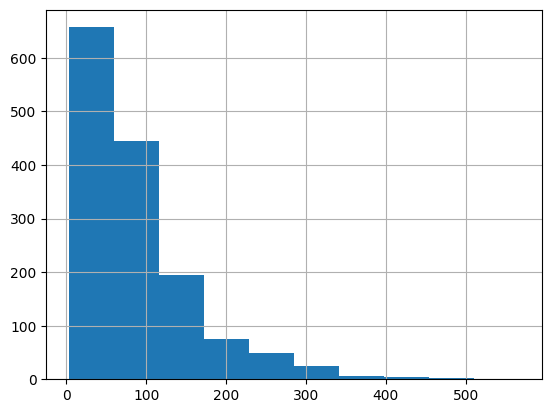

In [169]:
# Dongsi Dataframe
dongsi_daily['PM2.5'].hist()

> Dstribusi yang right-skewed pada data PM2.5 kota Dongsi menunjukkan bahwa mayoritas waktu udara memiliki tingkat polusi yang rendah. Fluktuasi yang tinggi dan adanya titik-titik ekstrim yang tinggi menunjukkan bahwa ada variasi yang signifikan dalam tingkat PM2.5 dari waktu ke waktu di kota Dongsi. Berdasarkan analisis statistika deskriptif sebelumnya, nilai standar deviasi yang tinggi menunjukkan bahwa data memiliki variasi yang besar dari mean.

<Axes: >

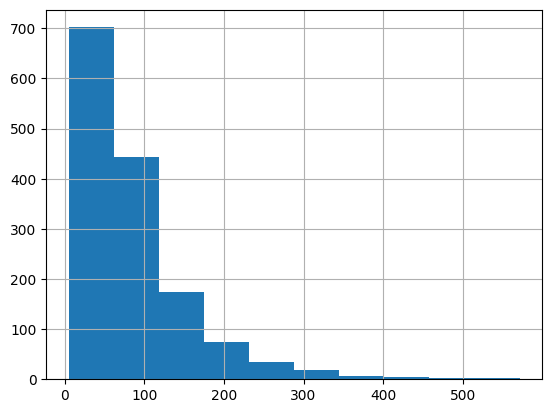

In [170]:
# Guanyuan Dataframe
guanyuan_daily['PM2.5'].hist()

> Distribusi right-skewed dari data PM2.5 kota Guanyuan mengindikasikan bahwa mayoritas periode memiliki tingkat polusi udara yang rendah. Tetapi, fluktuasi yang tinggi dan keberadaan nilai ekstrim menandakan variasi yang besar dalam tingkat PM2.5 dari waktu ke waktu di wilayah tersebut. Dengan standar deviasi yang tinggi menunjukkan variasi yang signifikan dari nilai rata-rata.

<Axes: >

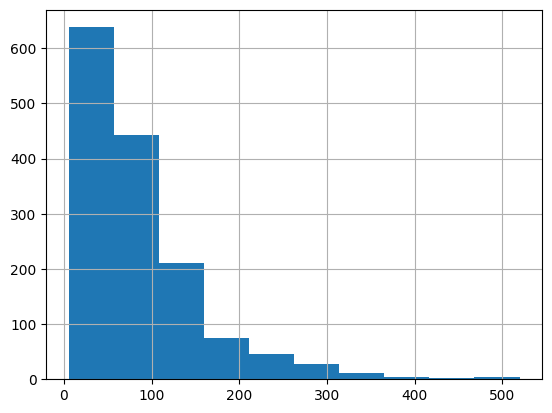

In [78]:
# Gucheng Dataframe
gucheng_daily['PM2.5'].hist()

> Rata-rata PM2.5 yang relatif rendah dapat memberikan gambaran positif tentang kualitas udara secara keseluruhan di Kota Gucheng. Namun, fluktuasi yang tinggi dan adanya nilai ekstrim yang signifikan menunjukkan variasi yang cukup besar dalam tingkat PM2.5 dari waktu ke waktu di wilayah tersebut. Dengan nilai standar deviasi yang tinggi menunjukkan variasi yang signifikan dari mean.

<Axes: >

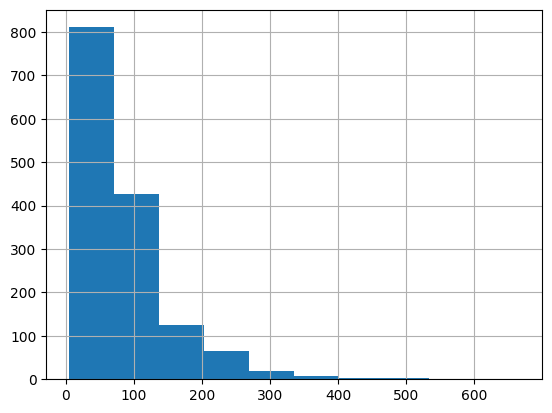

In [171]:
# Shunyi Dataframe
shunyi_daily['PM2.5'].hist()

> Dalam konteks distribusi yang condong ke kiri (right-skewed) untuk data PM2.5 kota Shunyi, interpretasi terhadap kualitas udara adalah mean PM2.5 yang relatif rendah memberikan gambaran positif tentang kualitas udara secara umum, fluktuasi yang tinggi dan nilai ekstrim yang tinggi menunjukkan bahwa ada variasi yang signifikan dalam tingkat PM2.5 dari waktu ke waktu di kota Shunyi. Nilai maksimum yang tinggi menunjukkan adanya titik-titik ekstrim dalam data di mana tingkat PM2.5 jauh lebih tinggi dari mean. Hal ini menekankan pentingnya pemantauan dan pengelolaan polusi udara secara terus-menerus untuk memastikan kualitas udara yang baik dan melindungi kesehatan masyarakat.

<Axes: >

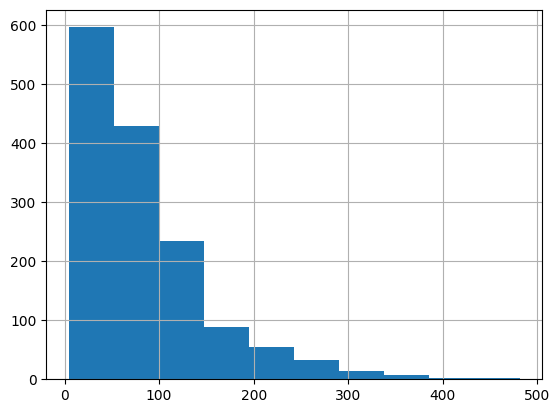

In [172]:
# Wanliu Dataframe
wanliu_daily['PM2.5'].hist()

> Distribusi right-skewed dari data PM2.5 kota Wanliu mengindikasikan bahwa mayoritas periode memiliki tingkat polusi udara yang rendah. Tetapi, fluktuasi yang tinggi dan keberadaan nilai ekstrim menandakan variasi yang besar dalam tingkat PM2.5 dari waktu ke waktu di wilayah tersebut. Dengan standar deviasi yang tinggi menunjukkan variasi yang signifikan dari nilai rata-rata.

> Distribusi PM2.5 yang condong ke kanan (right-skewed) menunjukkan bahwa lima kota tersebut memiliki tingkat polusi udara yang relatif rendah, tetapi terdapat beberapa kota yang memiliki tingkat polusi yang tinggi. Mayoritas kota menunjukkan bahwa mayoritas waktu udara memiliki tingkat polusi yang rendah, namun terdapat beberapa kota di mana tingkat polusi udara dapat meningkat secara signifikan.


>

>

>

### Pertanyaan 2:
Kota mana yang paling tercemar oleh kandungan PM2.5 dan PM10 dalam rentang 1 Maret 2013 hingga 28 Februari 2017?

In [173]:
bystation_df = merged_df.groupby(by='station').agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
})
bystation_df

,PM2.5,PM10
station,,
Dongsi,85.707535,110.733069
Guanyuan,83.156365,110.182739
Gucheng,84.144386,119.154602
Shunyi,77.708943,100.420672
Wanliu,83.441740,110.784039


<ipython-input-174-31624b58e640>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


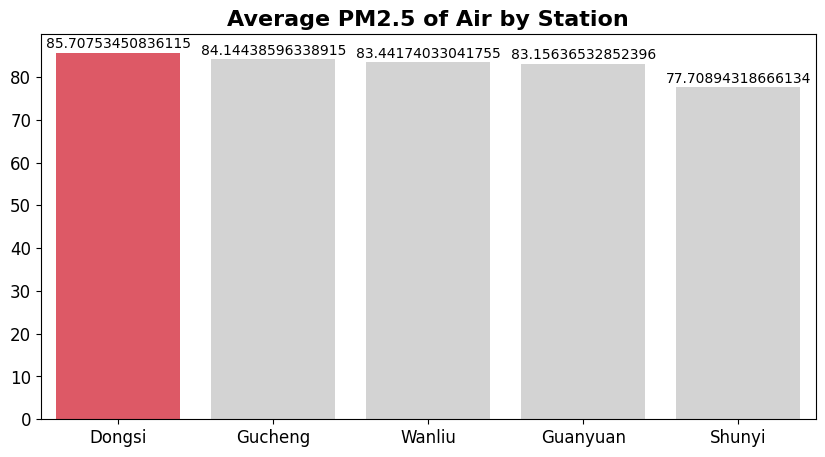

In [174]:
# PM2.5
plt.figure(figsize=(10, 5))
data = bystation_df.sort_values(by='PM2.5', ascending=False)
colors = ["#F34355", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y = 'PM2.5',
    x = 'station',
    data = data,
    palette = colors
)
plt.title('Average PM2.5 of Air by Station', loc = 'center', fontsize = 16, fontweight='bold')
plt.ylabel(None)
plt.xlabel(None)
for i in range(len(data)):
    plt.text(x=i, y=data['PM2.5'][i]+1, s=str(data['PM2.5'][i]), ha='center')
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

> Berdasarkan barplot di atas, dapat diketahui secara berurutan dari yanh tertinggi bahwa kota dengan rata-rata PM2.5 tertinggi adalah Dongsi, Gucheng, Wanliu, Guanyuan, Shunyi. Berdasarkan plot di atas, diketahui bahwa nilai PM2.5 antar kota memiliki perbedaan yang tipis. Untuk memastikannya dilakukan uji secara formal menggunakan uji ANOVA.

In [175]:
pm25_1 = merged_df[merged_df['station'] == 'Dongsi']['PM2.5']
pm25_2 = merged_df[merged_df['station'] == 'Guanyuan']['PM2.5']
pm25_3 = merged_df[merged_df['station'] == 'Gucheng']['PM2.5']
pm25_4 = merged_df[merged_df['station'] == 'Shunyi']['PM2.5']
pm25_5 = merged_df[merged_df['station'] == 'Wanliu']['PM2.5']

In [176]:
stat, p_value = f_oneway(pm25_1, pm25_2, pm25_3, pm25_4, pm25_5)
p_value

0.0409602622969819

Rumusan Hipotesis :
Hipotesis Nol (H0) : Tidak ada perbedaan yang signifikan dalam mean antara kategori pada kolom "station".

Hipotesis Nol (H1) : Ada perbedaan yang signifikan dalam mean antara kategori pada kolom "station".

Berdasarkan output didapatkan nilai p_value sebesar 0,04. Dengan taraf signifikansi sebesar 5%, dapat diketahui bahwa lima kategori tersebut memiliki perbedaan rata-rata PM2.5 yang signifikan.

<ipython-input-177-89f83c8f76d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


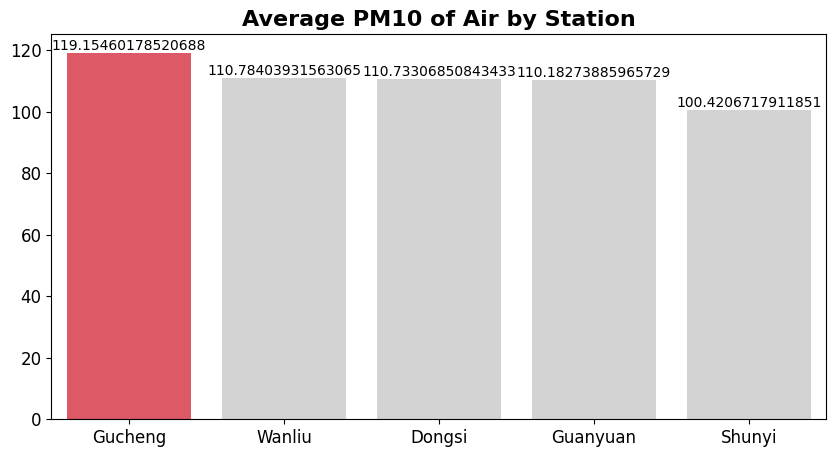

In [177]:
# PM10
plt.figure(figsize=(10, 5))
data = bystation_df.sort_values(by='PM10', ascending=False)
colors = ["#F34355", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y = 'PM10',
    x = 'station',
    data = data,
    palette = colors
)
plt.title('Average PM10 of Air by Station', loc = 'center', fontsize = 16, fontweight='bold')
plt.ylabel(None)
plt.xlabel(None)
for i in range(len(data)):
    plt.text(x=i, y=data['PM10'][i]+1, s=str(data['PM10'][i]), ha='center')
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

> Berdasarkan barplot di atas, dapat diketahui secara berurutan dari yanh tertinggi bahwa kota dengan rata-rata PM10 tertinggi adalah Gucheng, Wanliu, Dongsi, Guanyuan, dan Shunyi. Berdasarkan plot di atas, diketahui bahwa nilai PM10 antar kota memiliki perbedaan yang tipis. Untuk memastikannya dilakukan uji secara formal menggunakan uji ANOVA.

In [178]:
pm10_1 = merged_df[merged_df['station'] == 'Dongsi']['PM10']
pm10_2 = merged_df[merged_df['station'] == 'Guanyuan']['PM10']
pm10_3 = merged_df[merged_df['station'] == 'Gucheng']['PM10']
pm10_4 = merged_df[merged_df['station'] == 'Shunyi']['PM10']
pm10_5 = merged_df[merged_df['station'] == 'Wanliu']['PM10']

In [179]:
stat, p_value = f_oneway(pm10_1, pm10_2, pm10_3, pm10_4, pm10_5)
p_value

3.038334578444602e-08

Rumusan Hipotesis :
Hipotesis Nol (H0) : Tidak ada perbedaan yang signifikan dalam mean antara kategori pada kolom "station".

Hipotesis Nol (H1) : Ada perbedaan yang signifikan dalam mean antara kategori pada kolom "station".

Berdasarkan output didapatkan nilai p_value yang sangat kecil. Dengan taraf signifikansi sebesar 5%, dapat diketahui bahwa lima kategori tersebut memiliki perbedaan rata-rata PM10 yang signifikan.

### Pertanyaan 3:
- Bagaimana kondisi antar variabel PM2.5, PM10, dan CO saling mempengaruhi di udara?


Kondisi PM10 dalam udara dapat mempengaruhi kandungan CO. Untuk mengetahuinya, dilakukan analisis korelasi antara variabel PM10 dengan CO.

In [180]:
correlation_matrix = merged_df.corr()
correlation_matrix

<ipython-input-180-1f371e74ed93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


,PM2.5,PM10,CO
PM2.5,1.000000,0.845204,0.226251
PM10,0.845204,1.000000,0.179138
CO,0.226251,0.179138,1.000000


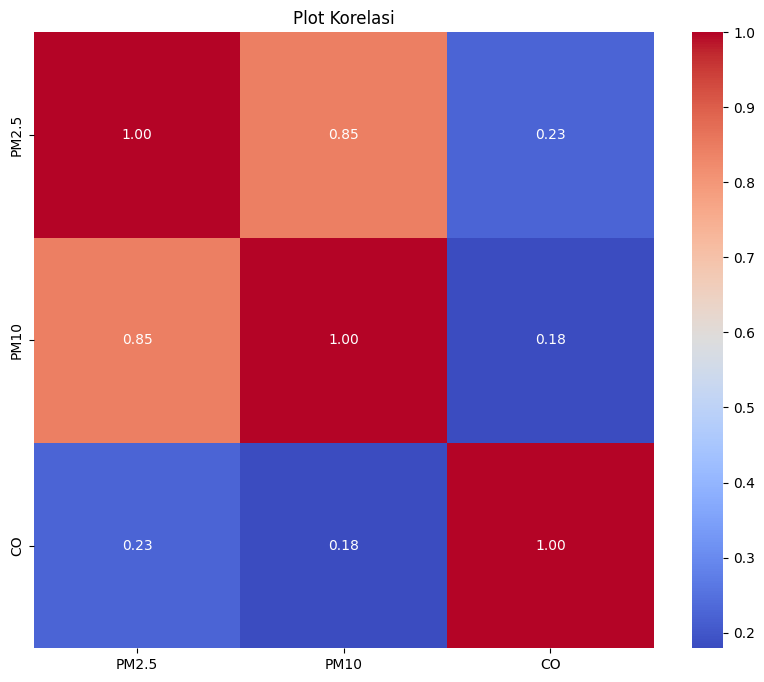

In [181]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Plot Korelasi')
plt.show()

> Berdasarkan plot di atas, dapat diketahui bahwa variabel PM10 dan PM2.5 saling mempengaruhi secara kuat sedangkan masing-masing kedua variabel tersebut memiliki nilai korelasi yang rendah terhadap CO. Artinya, kedua jenis PM tersebut memiliki pengaruh yang tidak kuat terhadap CO. Nilai korelasi yang positif berarti antar variabel memiliki perbandingan yang lurus.

### Pertanyaan 4:
- Bagaimana kondisi PM2.5 selama rentang waktu tersebut?


#### Dongsi

In [ ]:
dongsi_monthly = dongsi_df
dongsi_monthly['Date'] = pd.to_datetime(dongsi_monthly['year'].astype(str) + '-' + dongsi_monthly['month'].astype(str) + '-' + dongsi_monthly['day'].astype(str))
dongsi_monthly.set_index('Date', inplace=True)
dongsi_monthly = dongsi_monthly.resample(rule='M').agg({
    'PM2.5' : "mean",
    'PM10' : 'mean',
    'CO' : 'mean',
})
dongsi_monthly.reset_index(inplace=True)
dongsi_monthly['station'] = 'Dongsi'

In [187]:
pm25_monthly1 = {}

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for idx, month in enumerate(months, start=1):
    pm25_month = dongsi_monthly[dongsi_monthly['Date'].dt.month == idx]

    pm25_monthavg = pm25_month['PM2.5'].mean()

    pm25_monthly1[month] = pm25_monthavg

pm25_dongsi = pd.DataFrame(list(pm25_monthly1.items()), columns=['Month', 'PM2.5 AVG'])

pm25_dongsi

,Month,PM2.5 AVG
0,January,100.283884
1,February,95.552835
2,March,100.226296
3,April,77.336304
4,May,69.802059
5,June,73.811333
6,July,82.641444
7,August,58.608344
8,September,66.929696
9,October,98.125427


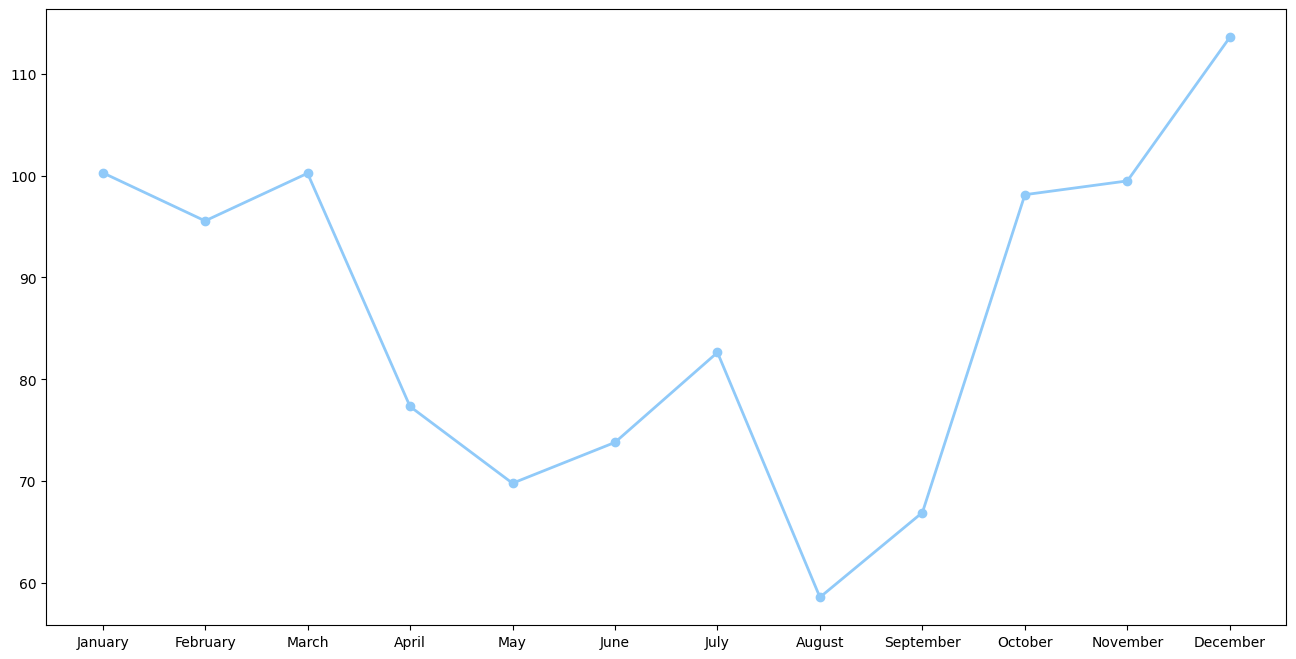

In [191]:
# PM2.5
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    pm25_dongsi["Month"],
    pm25_dongsi["PM2.5 AVG"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
plt.show()

Pola yang terbentuk cenderung fluktuatif. PM2.5 tertinggi terjadi di akhir tahun sedangkan terendah adalah di Bulan Agustus.

#### Guanyuan

In [190]:
guanyuan_monthly = guanyuan_df
guanyuan_monthly['Date'] = pd.to_datetime(guanyuan_monthly['year'].astype(str) + '-' + guanyuan_monthly['month'].astype(str) + '-' + guanyuan_monthly['day'].astype(str))
guanyuan_monthly.set_index('Date', inplace=True)
guanyuan_monthly = guanyuan_monthly.resample(rule='M').agg({
    'PM2.5' : "mean",
    'PM10' : 'mean',
    'CO' : 'mean',
})
guanyuan_monthly.reset_index(inplace=True)
guanyuan_monthly['station'] = 'guanyuan'

In [194]:
pm25_monthly2 = {}

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for idx, month in enumerate(months, start=1):
    pm25_month = guanyuan_monthly[guanyuan_monthly['Date'].dt.month == idx]

    pm25_monthavg = pm25_month['PM2.5'].mean()

    pm25_monthly2[month] = pm25_monthavg

pm25_guanyuan = pd.DataFrame(list(pm25_monthly2.items()), columns=['Month', 'PM2.5 AVG'])

pm25_guanyuan

,Month,PM2.5 AVG
0,January,98.139386
1,February,89.116126
2,March,94.354510
3,April,73.754520
4,May,64.088759
5,June,73.815533
6,July,75.164031
7,August,64.244989
8,September,65.087373
9,October,97.051434


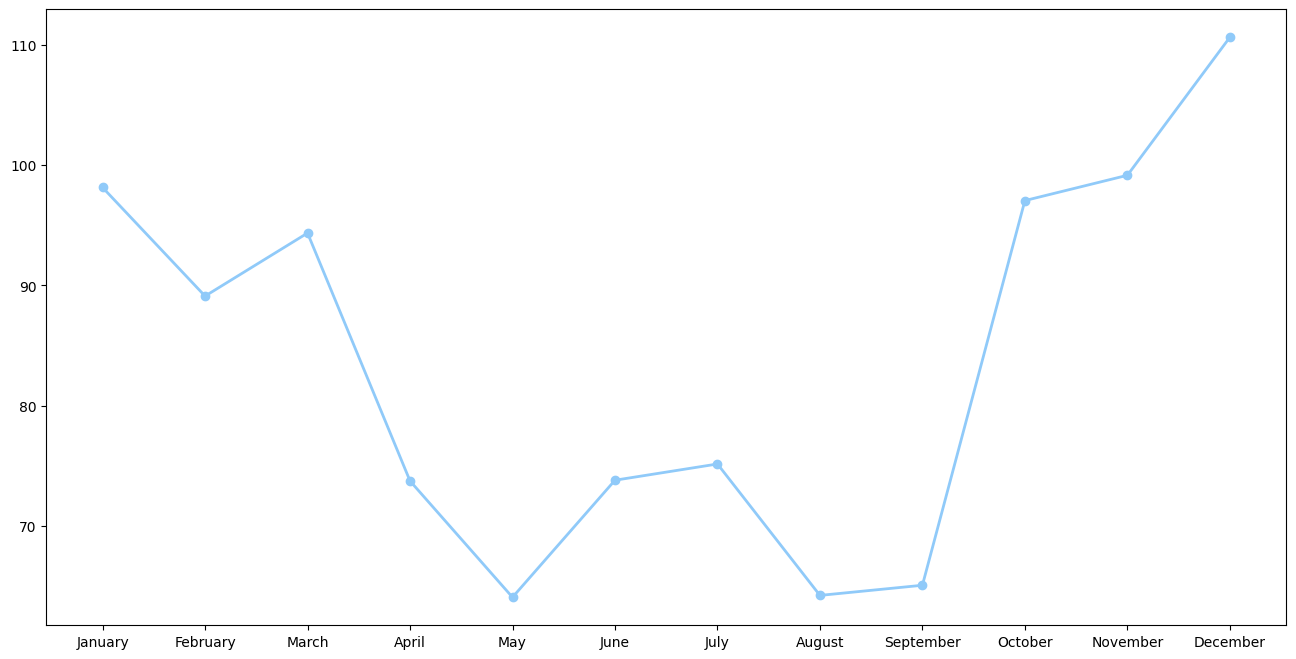

In [195]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    pm25_guanyuan["Month"],
    pm25_guanyuan["PM2.5 AVG"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
plt.show()

> Pola yang terbentuk cenderung fluktuatif. PM2.5 tertinggi terjadi di akhir tahun sedangkan terendah adalah di Bulan Mei.

#### Gucheng

In [196]:
gucheng_monthly = gucheng_df
gucheng_monthly['Date'] = pd.to_datetime(gucheng_monthly['year'].astype(str) + '-' + gucheng_monthly['month'].astype(str) + '-' + gucheng_monthly['day'].astype(str))
gucheng_monthly.set_index('Date', inplace=True)
gucheng_monthly = gucheng_monthly.resample(rule='M').agg({
    'PM2.5' : "mean",
    'PM10' : 'mean',
    'CO' : 'mean',
})
gucheng_monthly.reset_index(inplace=True)
gucheng_monthly['station'] = 'gucheng'

In [197]:
pm25_monthly3 = {}

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for idx, month in enumerate(months, start=1):
    pm25_month = gucheng_monthly[gucheng_monthly['Date'].dt.month == idx]

    pm25_monthavg = pm25_month['PM2.5'].mean()

    pm25_monthly3[month] = pm25_monthavg

pm25_gucheng = pd.DataFrame(list(pm25_monthly3.items()), columns=['Month', 'PM2.5 AVG'])

pm25_gucheng

,Month,PM2.5 AVG
0,January,101.372598
1,February,92.057949
2,March,98.699496
3,April,77.716689
4,May,67.619154
5,June,71.849396
6,July,71.769290
7,August,54.641502
8,September,65.616183
9,October,97.819094


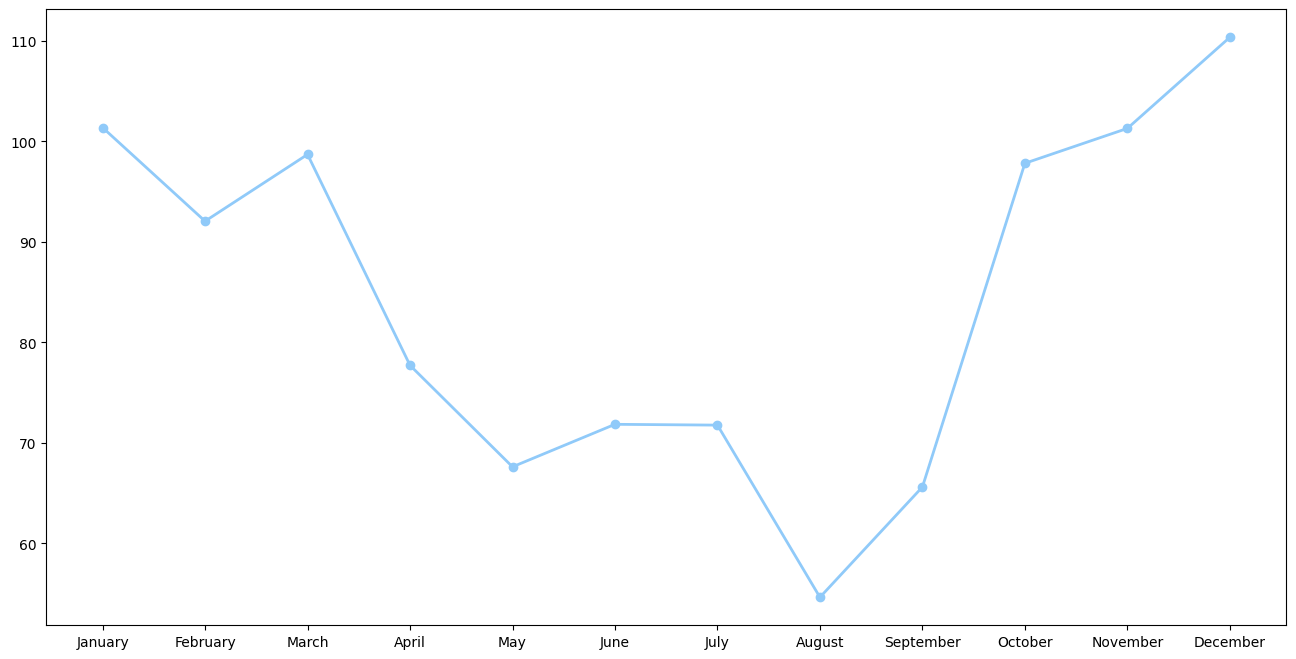

In [198]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    pm25_gucheng["Month"],
    pm25_gucheng["PM2.5 AVG"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
plt.show()

> Pola yang terbentuk cenderung fluktuatif. PM2.5 tertinggi terjadi di akhir tahun sedangkan terendah adalah di Bulan Agustus.

#### Shunyi

In [199]:
shunyi_monthly = shunyi_df
shunyi_monthly['Date'] = pd.to_datetime(shunyi_monthly['year'].astype(str) + '-' + shunyi_monthly['month'].astype(str) + '-' + shunyi_monthly['day'].astype(str))
shunyi_monthly.set_index('Date', inplace=True)
shunyi_monthly = shunyi_monthly.resample(rule='M').agg({
    'PM2.5' : "mean",
    'PM10' : 'mean',
    'CO' : 'mean',
})
shunyi_monthly.reset_index(inplace=True)
shunyi_monthly['station'] = 'shunyi'

In [200]:
pm25_monthly4 = {}

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for idx, month in enumerate(months, start=1):
    pm25_month = shunyi_monthly[shunyi_monthly['Date'].dt.month == idx]

    pm25_monthavg = pm25_month['PM2.5'].mean()

    pm25_monthly4[month] = pm25_monthavg

pm25_shunyi = pd.DataFrame(list(pm25_monthly4.items()), columns=['Month', 'PM2.5 AVG'])

pm25_shunyi

,Month,PM2.5 AVG
0,January,95.502291
1,February,93.333235
2,March,97.089491
3,April,74.610218
4,May,69.326951
5,June,70.582980
6,July,74.326228
7,August,53.298789
8,September,60.699493
9,October,87.050158


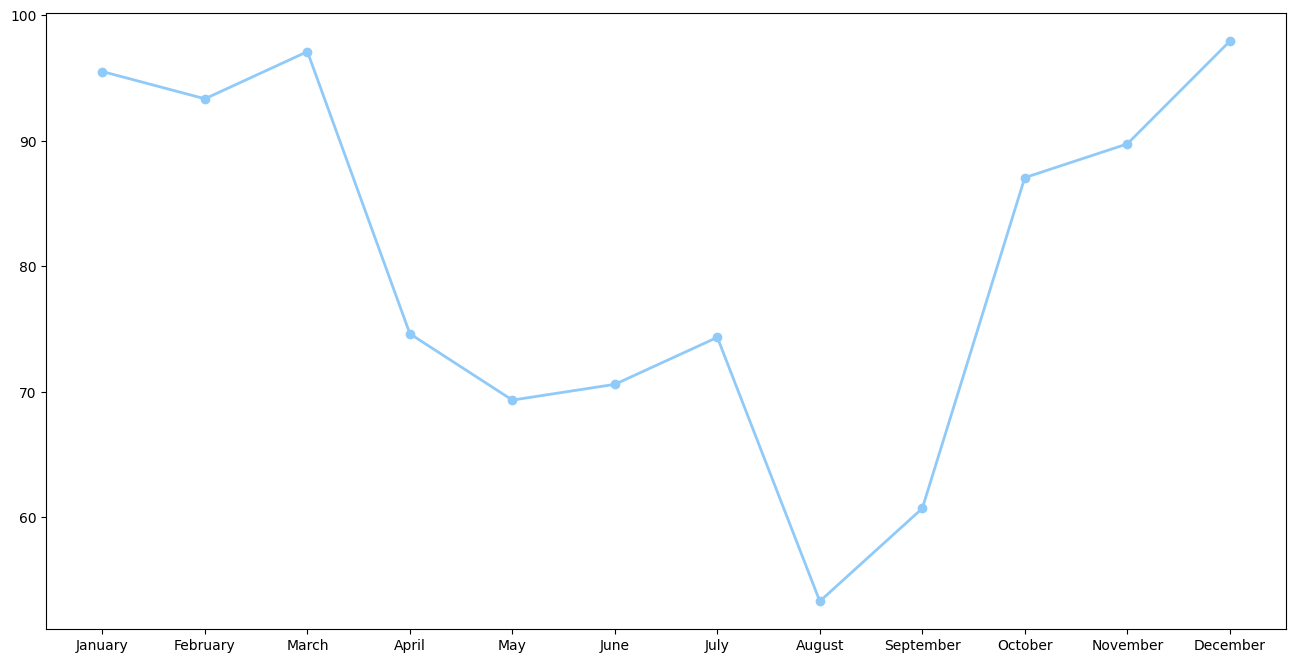

In [201]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    pm25_shunyi["Month"],
    pm25_shunyi["PM2.5 AVG"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
plt.show()

> Pola yang terbentuk cenderung fluktuatif. PM2.5 tertinggi terjadi di akhir tahun sedangkan terendah adalah di Bulan Agustus.

#### Wanliu

In [202]:
wanliu_monthly = wanliu_df
wanliu_monthly['Date'] = pd.to_datetime(wanliu_monthly['year'].astype(str) + '-' + wanliu_monthly['month'].astype(str) + '-' + wanliu_monthly['day'].astype(str))
wanliu_monthly.set_index('Date', inplace=True)
wanliu_monthly = wanliu_monthly.resample(rule='M').agg({
    'PM2.5' : "mean",
    'PM10' : 'mean',
    'CO' : 'mean',
})
wanliu_monthly.reset_index(inplace=True)
wanliu_monthly['station'] = 'wanliu'

In [203]:
pm25_monthly5 = {}

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for idx, month in enumerate(months, start=1):
    pm25_month = wanliu_monthly[shunyi_monthly['Date'].dt.month == idx]

    pm25_monthavg = pm25_month['PM2.5'].mean()

    pm25_monthly5[month] = pm25_monthavg

pm25_wanliu = pd.DataFrame(list(pm25_monthly5.items()), columns=['Month', 'PM2.5 AVG'])

pm25_wanliu

,Month,PM2.5 AVG
0,January,97.646418
1,February,92.087581
2,March,96.998319
3,April,73.781989
4,May,66.922774
5,June,74.065608
6,July,75.638180
7,August,56.373255
8,September,63.792036
9,October,95.738242


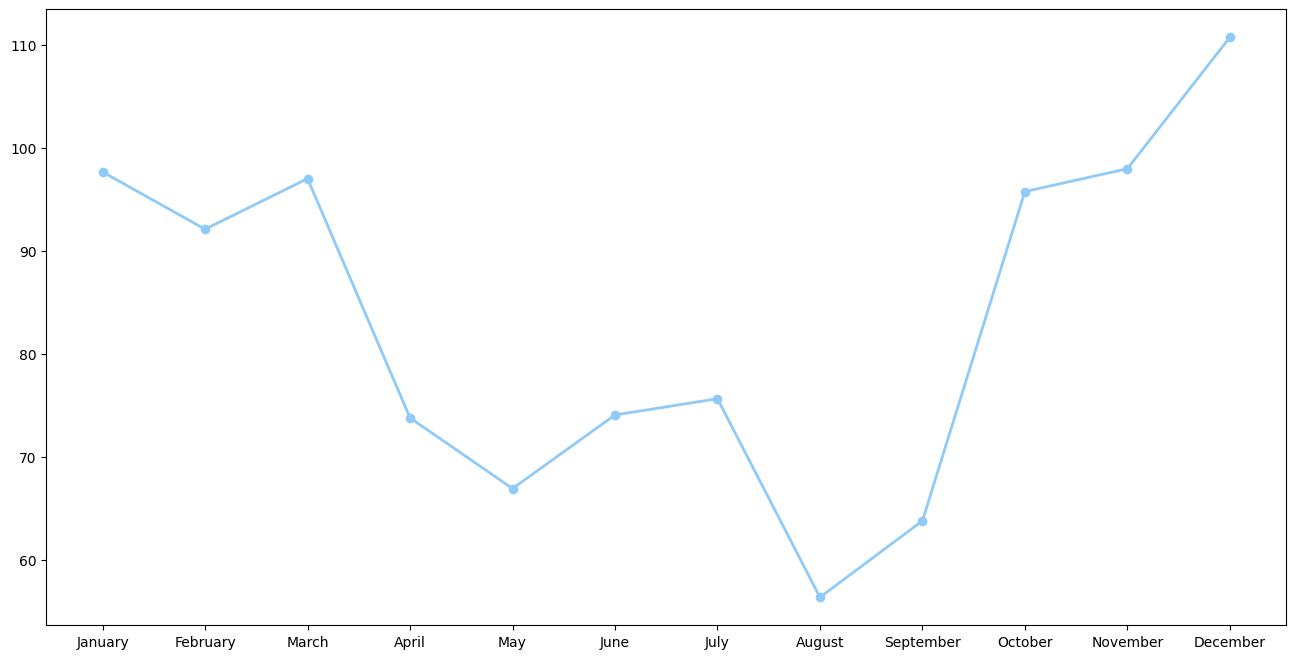

In [204]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    pm25_wanliu["Month"],
    pm25_wanliu["PM2.5 AVG"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
plt.show()

> Pola yang terbentuk cenderung fluktuatif. PM2.5 tertinggi terjadi di akhir tahun sedangkan terendah adalah di Bulan Agustus.

## Conclusion

- Distribusi PM2.5 yang condong ke kanan (right-skewed) menunjukkan bahwa lima kota tersebut memiliki tingkat polusi udara yang relatif rendah, tetapi terdapat beberapa kota yang memiliki tingkat polusi yang tinggi. Mayoritas kota menunjukkan bahwa mayoritas waktu udara memiliki tingkat polusi yang rendah, namun terdapat beberapa kota di mana tingkat polusi udara dapat meningkat secara signifikan.

- Kota Gucheng memiliki kadar PM2.5 yang tertinggi daripada kota lainnya sedangkan Kota Dongsi memiliki kadar PM10 paling tinggi. Berdasarkan pengujian formal, perbedaan antar kota adalah berbeda signifikan.

- Berdasarkan plot di atas, dapat diketahui bahwa variabel PM10 dan PM2.5 saling mempengaruhi secara kuat sedangkan masing-masing kedua variabel tersebut memiliki nilai korelasi yang rendah terhadap CO. Artinya, kedua jenis PM tersebut memiliki pengaruh yang tidak kuat terhadap CO. Nilai korelasi yang positif berarti antar variabel memiliki perbandingan yang lurus.

- Berdasarkan hasil analisis, di seluruh lima kota tersebut, kadar PM2.5 tertinggi terjadi di Bulan Desember yang nilainya jauh lebih tinggi dibandingkan bulan lainnya. Sebaliknya, Bulan Agustus menjadi yang paling rendah dibanding yang lain.

In [210]:
merged_df.to_csv('Dataframe Dashboard.csv', index=False)